In [1]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import hist
from hist import Hist
import awkward as ak
from numba import njit

In [2]:
with uproot.open("/N/project/ceem_coherent/CENNS750/sim_out/1458100/test_comp.root:CENNS") as cenns:
    en = cenns['en'].array()
    chans = cenns['chans'].array()
    top = cenns['top'].array()
    chanid = cenns['chanid'].array()
    genz = cenns['genz'].array()

In [3]:
z = ak.zip({"en": en, "chans": chans, "top": top, "genz": genz}, depth_limit=1)

Looking at all PEs for an event

In [4]:
def cut1(event):
    ly = np.array([len(chan) for chan in event['chans']])
    ts = event['top'] == 1
    bs = event['top'] != 1
    ly2 = ly > 2
    if abs(event['genz']) > 417.53:
        return -1
    if np.sum(ly2[ts]) > 0 and np.sum(ly2[bs]) > 0:
        return np.sum(ly)
    else:
        return -1

In [5]:
vals = [cut1(event) for event in z]

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f7ec8983ee0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

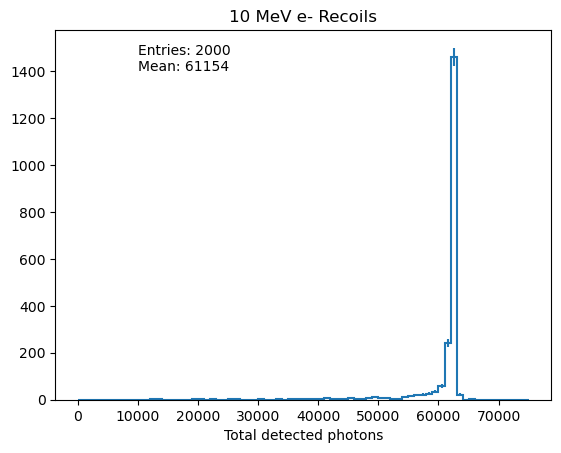

In [6]:
ly = Hist(hist.axis.Regular(75, 0, 75000))
ly.fill(vals)
fig, ax = plt.subplots()
ax.set_title("1 MeV e- Recoils")
ax.set_xlabel("Total detected photons")
ax.text(10000, 1400, f'Entries: {len(vals):.0f}\nMean: {np.sum((ly.values() / ly.sum()) * ly.axes[0].centers):.0f}')
ly.plot1d(ax=ax)

In [33]:
fig.savefig("/home/bojohn/LArAnalysis/plots/sims/cohar750_10MeVe-_center_totalPEs.png")

In [7]:
def cut2(event):
    ly = np.array([len(chan) for chan in event['chans']])
    ts = event['top'] == 1
    bs = event['top'] != 1
    ly2 = ly > 2
    if abs(event['genz']) > 417.53:
        return -1
    if np.sum(ly2[ts]) > 0 and np.sum(ly2[bs]) > 0:
        return len(event['chans'])
    else:
        return -1

In [8]:
vals = [cut2(event) for event in z]

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f7ebdfe8d60>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

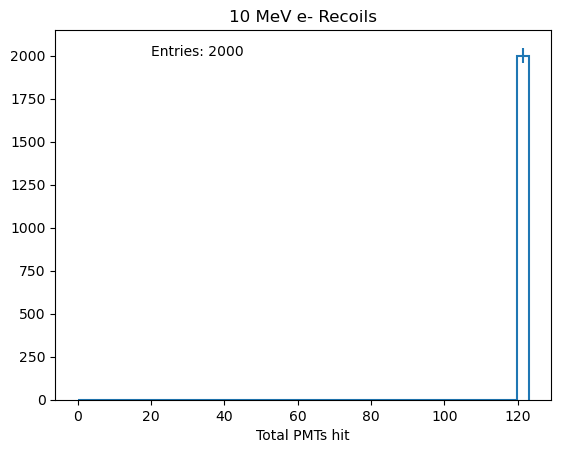

In [9]:
pmt = Hist(hist.axis.Regular(40, 0, 123, name="Total PMTs hit"))
pmt.fill(vals)
fig, ax = plt.subplots()
ax.set_title("1 MeV e- Recoils")
ax.text(20, 2000, f'Entries: {np.sum(pmt.values()):.0f}')
pmt.plot(ax=ax)

In [11]:
fig.savefig("/home/bojohn/LArAnalysis/plots/sims/cohar750_10MeVe-_center_totalhits.png")

In [10]:
def cut3(event):
    ly = np.array([len(chan) for chan in event['chans']])
    ts = event['top'] == 1
    bs = event['top'] != 1
    ly2 = ly > 2
    if abs(event['genz']) > 417.53:
        return -1
    if np.sum(ly2[ts]) > 0 and np.sum(ly2[bs]) > 0:
        return np.max(ly)
    else:
        return -1

In [11]:
vals = [cut3(event) for event in z]

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f7ebde9e260>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

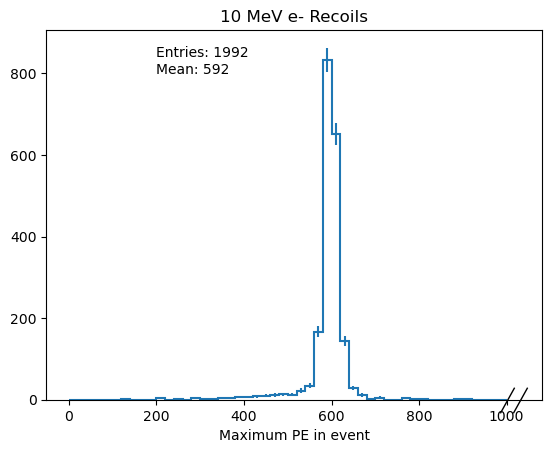

In [12]:
pmt = Hist(hist.axis.Regular(50, 0, 1000, name="Maximum PE in event"))
pmt.fill(vals)
fig, ax = plt.subplots()
ax.set_title("1 MeV e- Recoils")
ax.text(200, 800, f'Entries: {np.sum(pmt.values()):.0f}\nMean: {np.sum((pmt.values() / pmt.sum()) * pmt.axes[0].centers):.0f}')
pmt.plot(ax=ax)

In [30]:
fig.savefig("/home/bojohn/LArAnalysis/plots/sims/cohar750_10MeVe-_center_maxPEs.png")

In [4]:
def cut4(event):
    ly = ak.from_iter([len(chan) for chan in event['chans']])
    ts = event['top'] == 1
    bs = event['top'] != 1
    ly2 = ly > 2
    if abs(event['genz']) > 417.53:
        return -1
    if np.sum(ly2[ts]) > 0 and np.sum(ly2[bs]) > 0:
        return ly
    else:
        return -1

In [5]:
vals = [cut4(event) for event in z]

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fb72442dfc0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

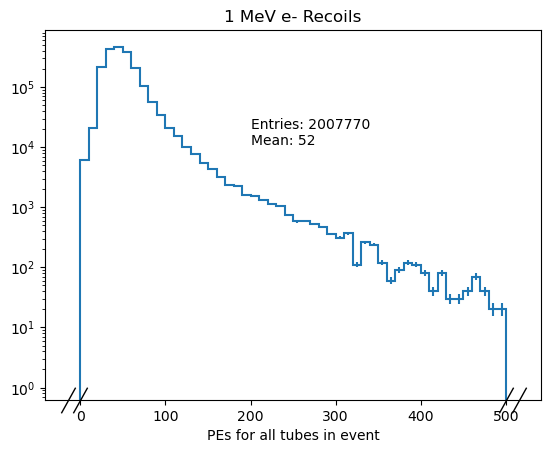

In [6]:
pmt = Hist(hist.axis.Regular(50, 0, 500, name="PEs for all tubes in event"))
for val in vals:
    pmt.fill(val)
fig, ax = plt.subplots()
ax.set_title("1 MeV e- Recoils")
ax.set_yscale('log')
ax.text(200, 11000, f'Entries: {np.sum(pmt.values()):.0f}\nMean: {np.sum((pmt.values() / pmt.sum()) * pmt.axes[0].centers):.0f}')
pmt.plot(ax=ax)

155.0


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fb6c4c7dcf0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

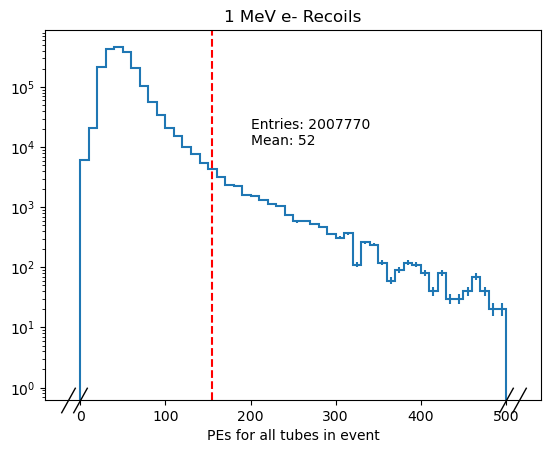

In [9]:
total = pmt.sum()
idx = np.argmin(np.abs(1e-2 - (1 - np.add.accumulate(pmt.values()) / total)))
cutoff = pmt.axes[0].centers[idx]
print(cutoff)
fig, ax = plt.subplots()
ax.set_title("1 MeV e- Recoils")
ax.set_yscale('log')
ax.text(200, 11000, f'Entries: {np.sum(pmt.values()):.0f}\nMean: {np.sum((pmt.values() / pmt.sum()) * pmt.axes[0].centers):.0f}')
ax.axvline(cutoff, color='red', ls='dashed')
pmt.plot(ax=ax)

In [23]:
fig.savefig("/home/bojohn/LArAnalysis/plots/sims/cohar750_1MeVe-_allPEs.png")

Look at same plot but for photons in first 90 ns

In [10]:
def cut5(event):
    ly = ak.from_iter([len(chan[chan < 90]) for chan in event['chans']])
    ts = event['top'] == 1
    bs = event['top'] != 1
    ly2 = ly > 2
    if abs(event['genz']) > 417.53:
        return -1
    if ak.sum(ly2[ts]) > 0 and ak.sum(ly2[bs]) > 0:
        return ly
    else:
        return -1

In [11]:
vals = [cut5(event) for event in z]

KeyboardInterrupt: 

In [ ]:
pmt = Hist(hist.axis.Regular(50, 0, 500, name="PEs (< 90 ns) for all tubes in event"))
for val in vals:
    pmt.fill(val)
fig, ax = plt.subplots()
ax.set_title("1 MeV e- Recoils")
ax.set_yscale('log')
ax.text(300, 8000, f'Entries: {np.sum(pmt.values()):.0f}\nMean: {np.sum((pmt.values() / pmt.sum()) * pmt.axes[0].centers):.0f}')
pmt.plot(ax=ax)

In [ ]:
total = pmt.sum()
idx = np.argmin(np.abs(1e-2 - (1 - np.add.accumulate(pmt.values()) / total)))
cutoff = pmt.axes[0].centers[idx]
print(cutoff)
fig, ax = plt.subplots()
ax.set_title("1 MeV e- Recoils")
ax.set_yscale('log')
ax.text(200, 11000, f'Entries: {np.sum(pmt.values()):.0f}\nMean: {np.sum((pmt.values() / pmt.sum()) * pmt.axes[0].centers):.0f}')
ax.axvline(cutoff, color='red', ls='dashed')
pmt.plot(ax=ax)

In [28]:
fig.savefig("/home/bojohn/LArAnalysis/plots/sims/cohar750_1MeVe-_90ns_allPEs.png")

Add in timing information to the plots

In [17]:
def cut6(event):
    ly = np.array([len(chan) for chan in event['chans']])
    ts = event['top'] == 1
    bs = event['top'] != 1
    ly2 = ly > 2
    # if sqrt(event['genx']**2 + event['geny']**2 + event['genz']**2) > 100.0:
    #     return -1
    if abs(event['genz']) > 417.53:
        return None
    if np.sum(ly2[ts]) > 0 and np.sum(ly2[bs]) > 0:
        return ak.flatten(event['chans'])
    else:
        return None

In [18]:
vals = [cut6(event) for event in z]

In [19]:
vals = list(filter(lambda x: x is not None, vals))

In [7]:
total_pes = [i[0] for i in vals]
times = [i[1] for i in vals]

In [29]:
pestimes = Hist(hist.axis.Regular(100, 0, 6000, name="T", label="Photon arrival time [ns]"))
for val in vals:
    pestimes.fill(val)

In [30]:
h, e = pestimes.to_numpy()

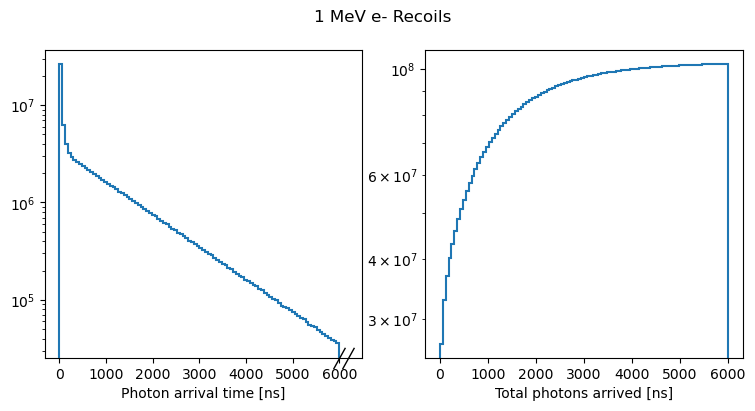

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(9, 4))
fig.suptitle('1 MeV e- Recoils')
ax[0].set_yscale('log')
pestimes.plot(ax=ax[0])
ax[1].set_yscale('log')
ax[1].set_xlabel('Total photons arrived [ns]')
ax[1].stairs(np.add.accumulate(h), edges=e, lw=1.5)
# pestimes.plot2d(ax=ax[1], norm=colors.LogNorm(vmin=1, vmax=np.max(pestimes.values()), clip=True))

In [32]:
fig.savefig("/home/bojohn/LArAnalysis/plots/sims/cohar750_1MeVe-_allPEtimes.png")

In [16]:
@njit
def fill_vals(events):
    lys = []
    for event in events:
        if abs(event['genz']) > 417.52:
            continue
        ly = []
        good_tops = []
        good_bots = []
        for top, chan in zip(event['top'], event['chans']):
            if top and len(chan) > 2:
                good_tops.append(True)
            elif top:
                good_tops.append(False)
            elif not top and len(chan) > 2:
                good_bots.append(True)
            elif not top:
                good_bots.append(False)
            total = 0
            for t in chan:
                if t < 90:
                    total += 1
            ly.append(total)
            # ly.append(len(chan))
        if np.any(np.array(good_tops)) and np.any(np.array(good_bots)):
            lys.append(ly)
    return lys

In [17]:
vals = fill_vals(z)

In [18]:
pmt = Hist(hist.axis.Regular(50, 0, 500, name="PEs (< 90 ns) for all tubes in event"))
for val in fill_vals(z):
    pmt.fill(val)

25.0


[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f8768bfec00>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

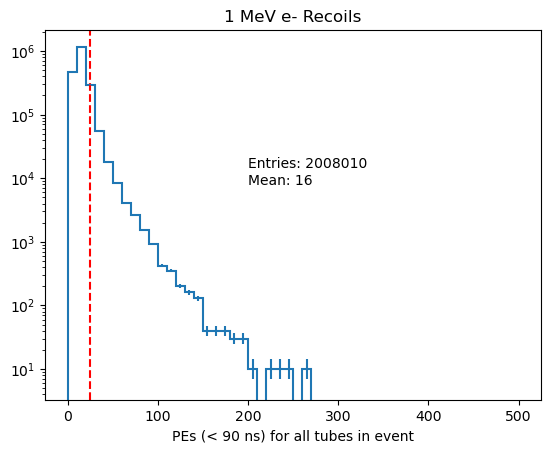

In [19]:
total = pmt.sum()
idx = np.argmin(np.abs(1e-1 - (1 - np.add.accumulate(pmt.values()) / total)))
cutoff = pmt.axes[0].centers[idx]
print(cutoff)
fig, ax = plt.subplots()
ax.set_title("1 MeV e- Recoils")
ax.set_yscale('log')
ax.text(200, 8000, f'Entries: {np.sum(pmt.values()):.0f}\nMean: {np.sum((pmt.values() / pmt.sum()) * pmt.axes[0].centers):.0f}')
ax.axvline(cutoff, color='red', ls='dashed')
pmt.plot(ax=ax)

In [15]:
fig.savefig("/N/project/ceem_coherent/CENNS750/sim_out/plots/1MeVe-_PEs_90percutoff.png")